In [1]:
# 06_pca_tsne (n)
# 1. Dla danych z zadania z 05 wykonaj:
# PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
# utwórz wykres typu "słupkowego" dla wszystkich n_components_
# oblicz n_components_, które zachowają wariancję na poziomie 95%
# 2. Dla datasetu z projektu:
# utwórz scatter plot, korzystając z:
# t-SNE*
# PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
# porównaj czas oraz "jakość" powyższych wykresów
# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator

# * Jeżeli czas utworzenia wykresu z wykorzystaniem t-SNE jest za długi,  zmniejsz dataset (wybierz losowe obserwacje)

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_06_niestacj.jpg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
seed = np.random.seed(204)

# 1

In [4]:
from sklearn.datasets import load_wine

In [5]:
# load and return the diabetes dataset (classification).
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
# data, target assignments
X, y = wine.data, wine.target

In [7]:
# standar scaling
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

In [8]:
elements = [2, 4, 6]
ele_sum = []

In [9]:
# cumsum for every PCA with n_component
for ele in elements:
    pca = PCA(n_components=ele, random_state=seed)
    pca.fit(X_std)
    
    expl_ratio = pca.explained_variance_ratio_
    print(expl_ratio)
    
    expl_ratio_sum = sum(expl_ratio)
    ele_sum.append(expl_ratio_sum)

[0.36198848 0.1920749 ]
[0.36198848 0.1920749  0.11123631 0.0706903 ]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


<AxesSubplot:xlabel='n. of components'>

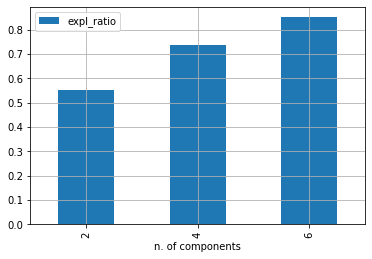

In [10]:
df_to_plot = pd.DataFrame(ele_sum, index=elements, columns=["expl_ratio"])
df_to_plot.index.name = "n. of components"
df_to_plot.plot(kind="bar", grid=True)

In [11]:
pca = PCA(n_components=0.95, random_state=seed)
x_reduced = pca.fit_transform(X)

pca.n_components_

1

# 2

https://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharinghttps://drive.google.com/drive/folders/1kTundijeYX-E-ze4Dm5DqEVsH1o1YJf9?usp=sharing

In [12]:
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [13]:
train_data = pd.read_csv("project_data/train_data.csv", header=None)
test_data = pd.read_csv("project_data/test_data.csv", header=None)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 95.4 MB


In [16]:
# just take 0.2 of train_data
train_data_02, train_data_08 = train_test_split(train_data, test_size=0.8, shuffle=True, random_state=seed)

In [17]:
# just take 0.2 of test_data
test_data_02, test_data_08 = train_test_split(test_data, test_size=0.8, shuffle=True, random_state=seed)

In [18]:
# standar scaling
scaler = StandardScaler().fit(test_data_02)
data_std = scaler.transform(test_data_02)

In [19]:
# dimensionality reduction pca
pca = PCA(n_components=2, whiten=True, random_state=seed)
pca_data = pca.fit_transform(data_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.00515961 0.00504119]
[113.57388293 112.26293677]


In [20]:
# dimensionality reduction tsne
tsne = TSNE(n_components=2, random_state=seed)
tsne_data = tsne.fit_transform(data_std)

#print(tsne.embedding_)
print(tsne.kl_divergence_)

1.107997179031372


In [21]:
data_sets = [pca_data, tsne_data]
data_names = ["pca_data", "tsne_data"]
colors = ["r", "g", "lb"]

time of 1 plot: 0.04300498962402344 seconds
time of 1 plot: 0.024996042251586914 seconds


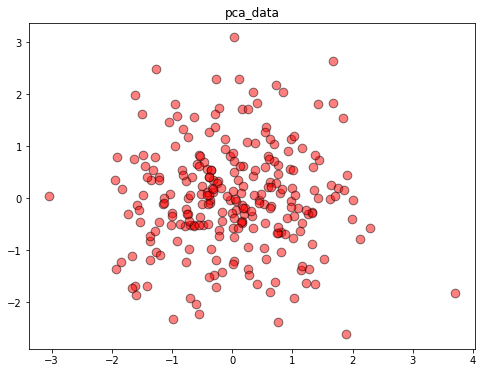

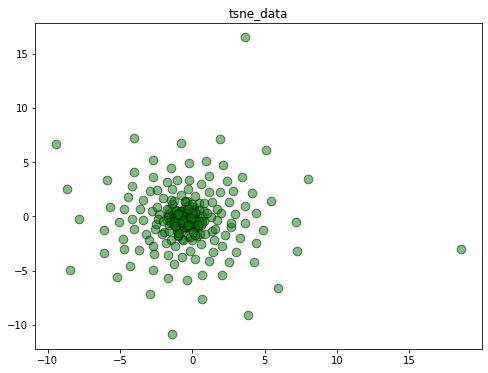

In [22]:
# plots 
for i, n, c in zip(data_sets, data_names, colors):
    plt.figure(figsize=(8, 6))
    start_time = time.time()
    plt.scatter(
        i[:, 0], i[:, 1],
        s=75, c=c,
        marker="o", 
        alpha=0.5,
        edgecolor="black"
    )
    end_time = time.time()
    plt.title(n)
    print(f"time of 1 plot: {end_time - start_time} seconds")

In [23]:
# define pipeline
pipe = Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=seed)),
    ("tsne", TSNE(n_components=2, random_state=seed)),
])

In [24]:
# fit transform method
piped = pipe.fit_transform(test_data_02)

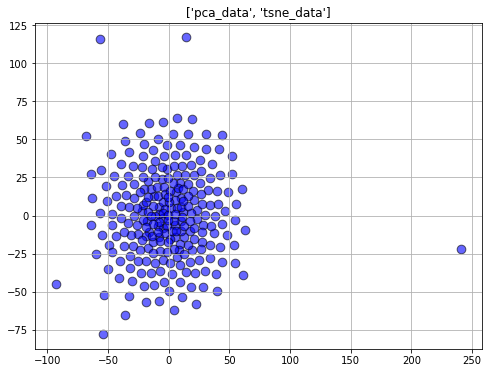

In [25]:
# scatter for claster visibility
plt.figure(figsize=(8, 6))
plt.scatter(
    piped[:, 0],
    piped[:, 1],
    s=75, c="b",
    marker="o", 
    alpha=0.6,
    edgecolor="black"
    )

plt.title(data_names)
plt.grid()
plt.show()

# 3

In [26]:
train_labels = pd.read_csv("project_data/train_labels.csv", header=None)

In [27]:
y2 = train_labels[0].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y2, test_size=0.95, shuffle=True, random_state=seed)

In [29]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
# X_test_std = scaler.transform(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

kpca = KernelPCA()
svc_model = SVC()

pipe = Pipeline(steps=[('kpca', kpca), ('svc_model', svc_model)])
pipe.fit(X_train_std, y_train)

param_dict = {"kpca__gamma": np.linspace(0.03, 0.05, 5),
              "kpca__kernel": ['linear', 'poly', 'rbf'],
              "svc_model__C": [0.1, 1, 10, 100, 1000],
              "svc_model__gamma": [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(pipe, param_dict, verbose=0)
grid.fit(X_train_std, y_train)

GridSearchCV(estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('svc_model', SVC())]),
             param_grid={'kpca__gamma': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                         'kpca__kernel': ['linear', 'poly', 'rbf'],
                         'svc_model__C': [0.1, 1, 10, 100, 1000],
                         'svc_model__gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [31]:
grid.best_params_

{'kpca__gamma': 0.03,
 'kpca__kernel': 'linear',
 'svc_model__C': 0.1,
 'svc_model__gamma': 1}

In [32]:
grid.best_score_

0.9359886201991465